In [86]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [87]:
X, y = make_classification(n_samples = 10000,
                           n_features = 10, n_informative = 10, n_redundant = 0,
                           flip_y = 0.025, n_clusters_per_class = 5, 
                           weights = np.array([0.9, 0.1]), class_sep = 3,
                           random_state = 30
                          )

In [88]:
print(f"feature matrix dimensions: {X.shape} \nnumber of positive (friends) instances = {y.sum()} ({y.sum()*100 / len(y)}%) of out total {y.shape[0]}")

feature matrix dimensions: (10000, 10) 
number of positive (friends) instances = 1089 (10.89%) of out total 10000


<AxesSubplot:>

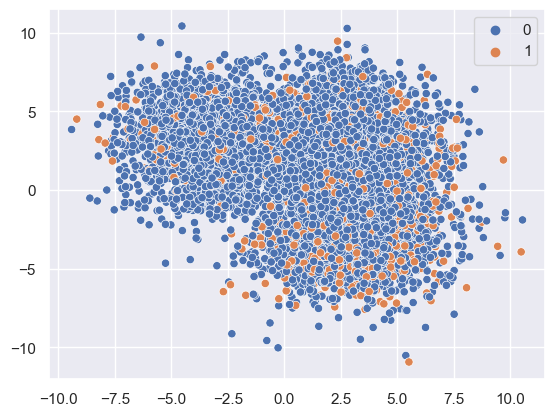

In [20]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)

In [5]:
df = pd.DataFrame(np.c_[X,y.astype(int)], columns = [['col_' + str(x) for x in range(0,10)] + ['y']])
df['y'] = df['y'].astype(int)
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,y
0,1.488781,5.472129,-2.993645,2.544250,2.869777,-1.231522,4.750677,3.096177,0.608490,-5.326152,1
1,-3.611974,1.278216,3.690330,-4.096570,3.478024,-2.643575,-3.118823,-4.334983,4.314904,2.426074,0
2,-2.738208,5.279067,3.928992,-0.954740,1.779182,-3.441466,-4.881578,-1.651149,0.720763,4.957906,1
3,4.587068,-0.082219,-6.524400,0.801166,1.792437,2.408539,-1.912027,5.109881,4.795025,-3.237587,1
4,3.282668,6.144384,4.066514,-4.967542,0.568282,-3.315710,-4.106356,2.544191,2.403110,4.302320,0


ValueError: could not broadcast input array from shape (10000,1) into shape (10000,)

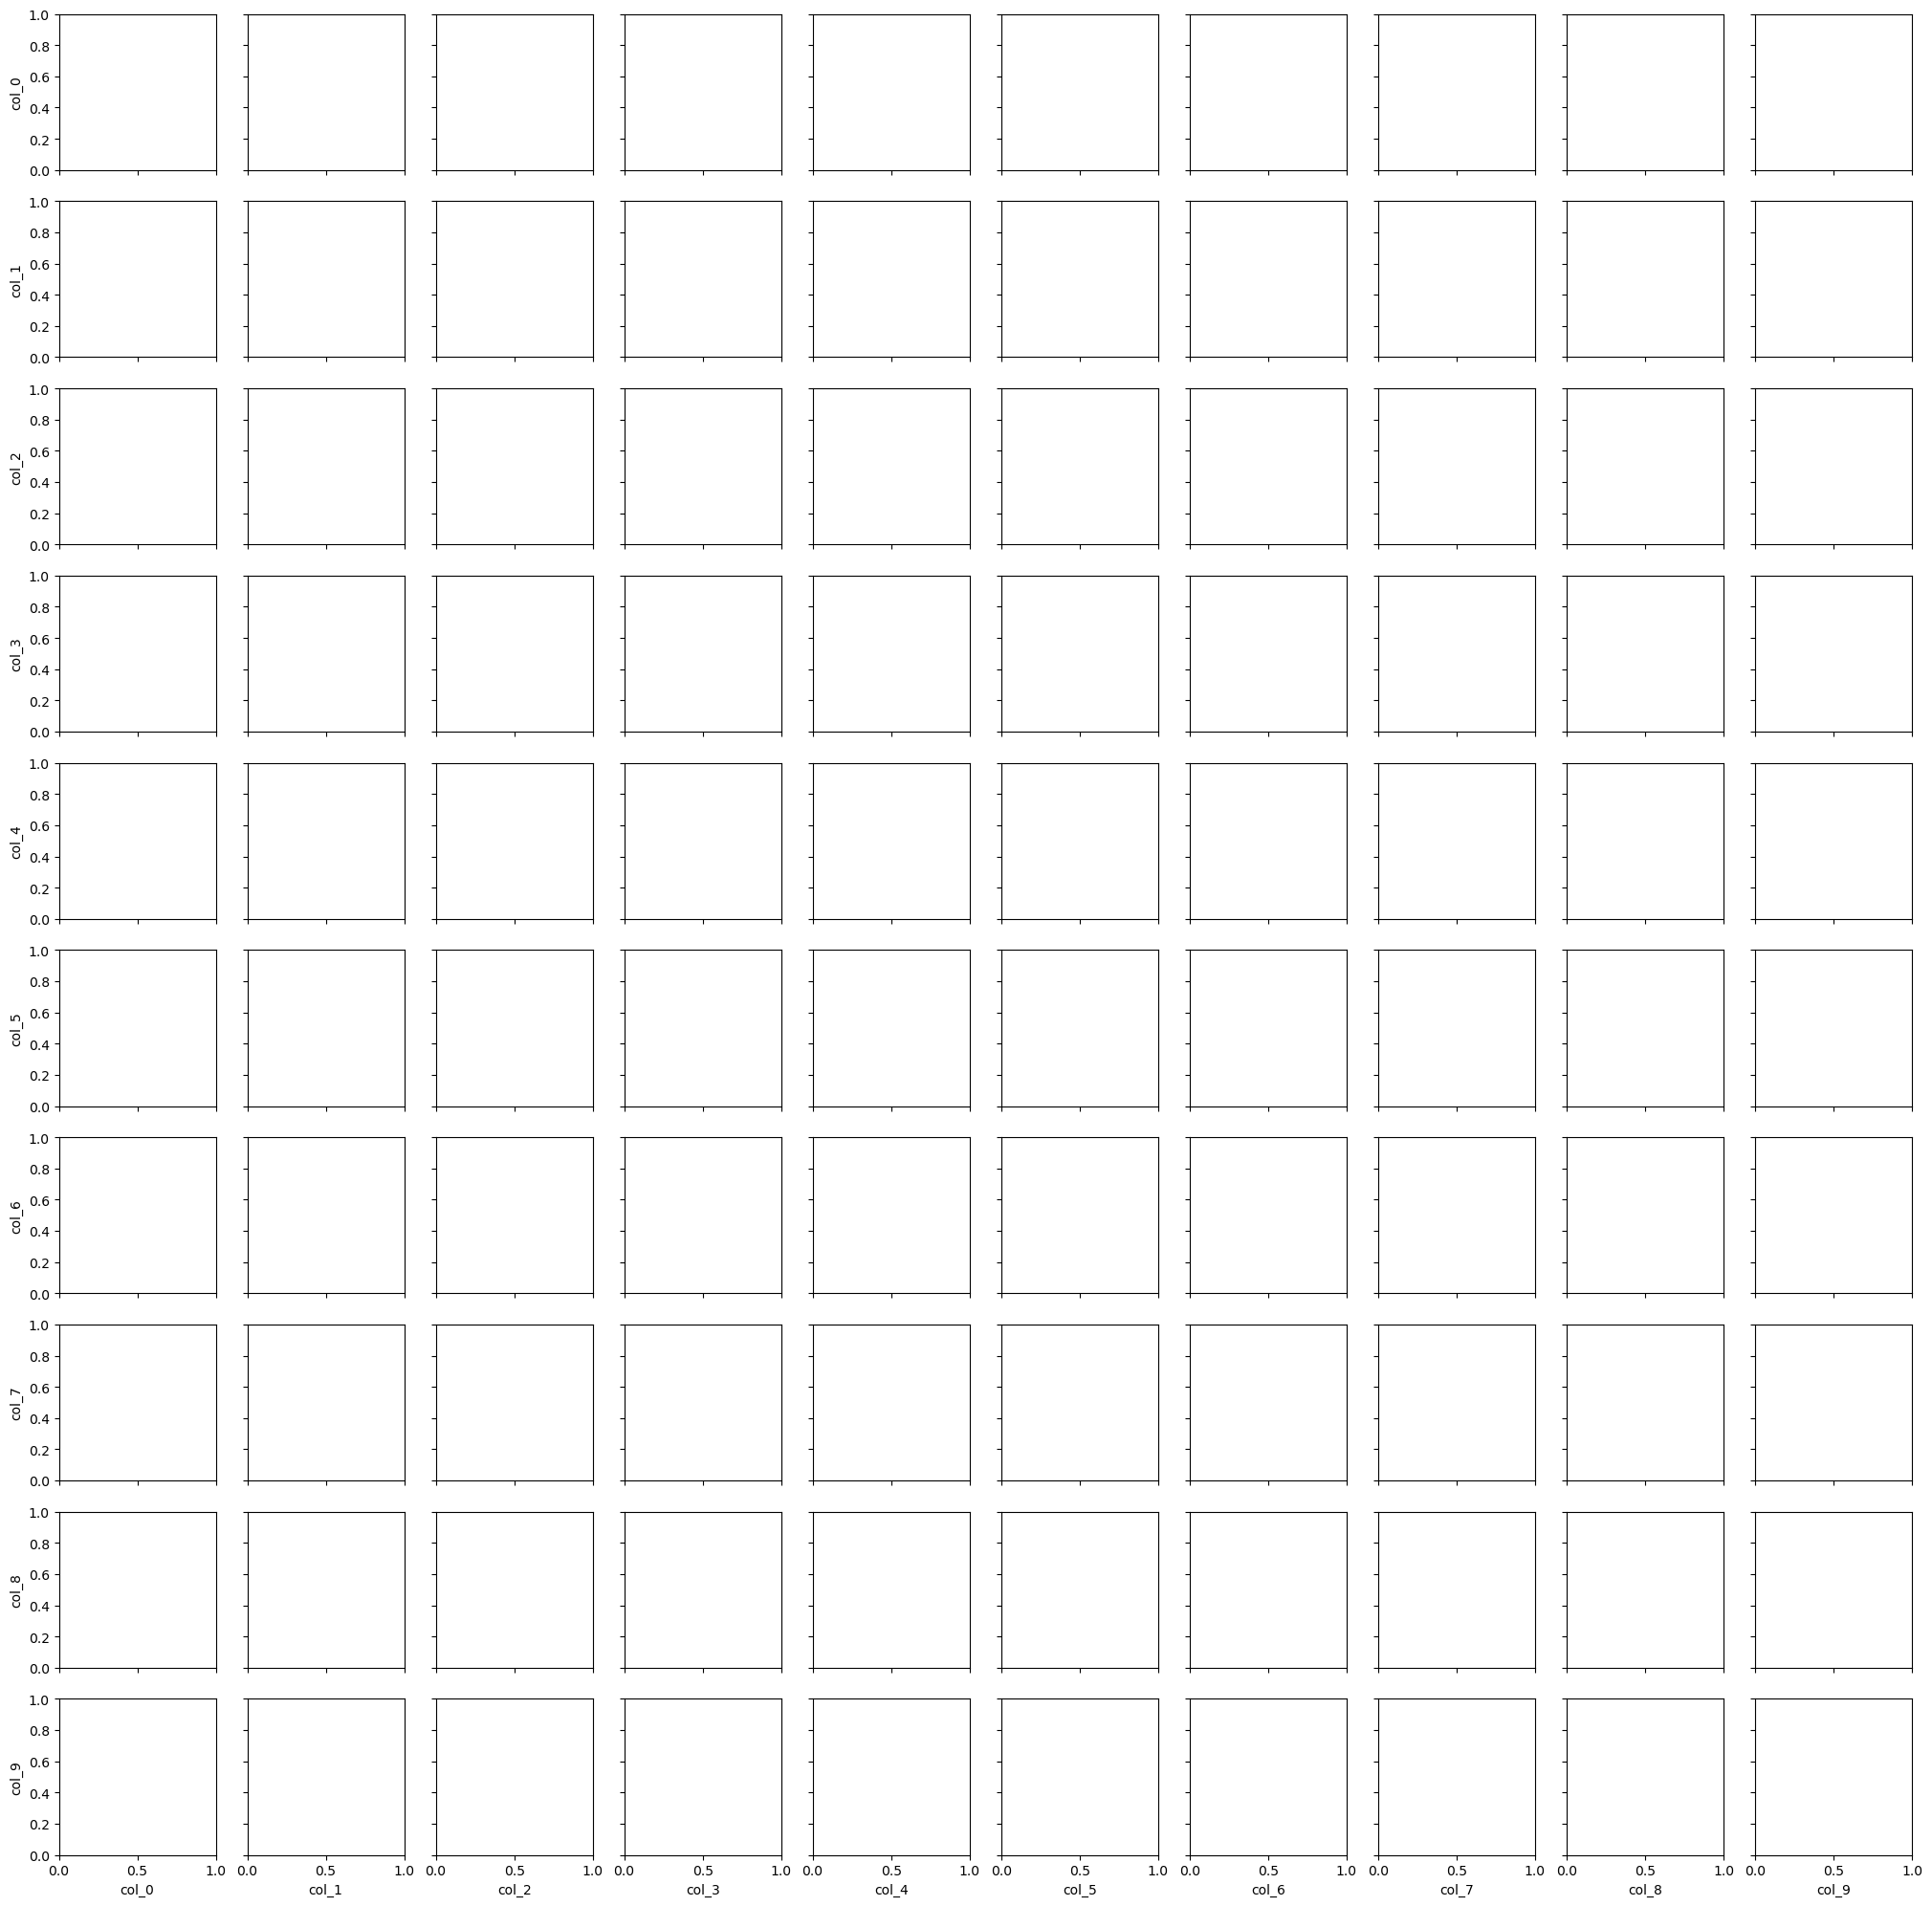

In [6]:
g = sns.PairGrid(df, vars = ['col_' + str(x) for x in range(0,10)], hue = 'y')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_validate

In [90]:
clf = GaussianNB()
cv = StratifiedKFold(n_splits=10)
metrics = ['f1', 'accuracy']
scores = cross_validate(clf, X, y, scoring=metrics, cv = cv)

In [91]:
for metric in metrics:
    print(f"{metric}: {scores['test_' + metric].mean():.4f} \u00B1 {scores['test_' + metric].std():.4f}")

f1: 0.6468 ± 0.0361
accuracy: 0.9354 ± 0.0057


In [92]:
np.random.seed(52) #2
random_10_indices = np.random.choice(range(len(y)), 10)
X_initial_selection, y_initial_selection = X[random_10_indices, :], y[random_10_indices]

In [93]:
f"Number of positive cases in intial random 10 cases: {y_initial_selection.sum()}"

'Number of positive cases in intial random 10 cases: 3'

In [94]:
mask = np.ones(X.shape[0], dtype=bool)
mask[random_10_indices] = False
X_sample, y_sample = X[mask, :], y[mask]

In [95]:
X_sample.shape, y_sample.shape

((9990, 10), (9990,))

In [96]:
y_sample.sum()

1086

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, stratify=y_sample, test_size=0.20, random_state = 30)

print(f"Training Data Shape: {X_train.shape} , positive cases: {y_train.sum()}\nTest Data Shape: {X_test.shape} , positive cases: {y_test.sum()}")

Training Data Shape: (7992, 10) , positive cases: 869
Test Data Shape: (1998, 10) , positive cases: 217


In [98]:
regroup = GaussianNB()
regroup = regroup.partial_fit(X_initial_selection, y_initial_selection, classes=np.unique(y))

In [99]:
from sklearn.metrics import accuracy_score, f1_score 

In [100]:
X_train.shape

(7992, 10)

In [101]:
train_sample_dynamic = X_train
train_label_dynamic = y_train

In [106]:
n = 0
#Unlearnable Groups Hyperparameter v
v = 0.9

f1_hist, acc_hist = [], []

while len(train_sample_dynamic) > 0:
    # pred_prob_vector = regroup.predict_proba(train_sample_dynamic)[:,1] * (v **n)

    # if n % 100 == 0:
    # print(f1_score(regroup.predict(X_test), y_test))
    # print(accuracy_score(regroup.predict(X_test), y_test))
    
    f1_hist.append(f1_score(regroup.predict(X_test), y_test))
    acc_hist.append(accuracy_score(regroup.predict(X_test), y_test))


    pred_prob_vector = regroup.predict_proba(train_sample_dynamic)[:,1] * (v ** n)

    # df = pd.DataFrame(train_label_dynamic)
    # positive_labels = df[df[0] == 1].index.values

    # human_positive_labeled_instance = pred_prob_vector.argmax()
    random = np.random.choice(range(len(pred_prob_vector)))
    break
    print(random)
    # print(human_positive_labeled_instance)

    new_train_x = train_sample_dynamic[human_positive_labeled_instance, :].reshape(1,-1)
    new_train_y = train_label_dynamic[human_positive_labeled_instance].reshape(1)

    train_sample_dynamic = np.delete(train_sample_dynamic, human_positive_labeled_instance, axis = 0).reshape(-1, 10)
    train_label_dynamic = np.delete(train_label_dynamic, human_positive_labeled_instance, axis = 0)

    regroup = regroup.partial_fit(new_train_x, new_train_y, classes=np.unique(y))

    n += 1
    # break

In [ ]:
# import random
# import matplotlib
# from matplotlib import animation
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from itertools import count

In [ ]:
# t = range(len(acc_hist))
# x_point, y_point =[], []

# fig = plt.figure(figsize=(8,6))
# axes = fig.add_subplot(1,1,1)

# def animate(i):
#     x_point.append(t[i])
#     y_point.append((acc_hist[i]))
#     plt.plot(x_point, y_point, scaley=True, scalex=True, color="blue")
    
# ani = FuncAnimation(fig=fig, func=animate, interval=10)

<AxesSubplot:>

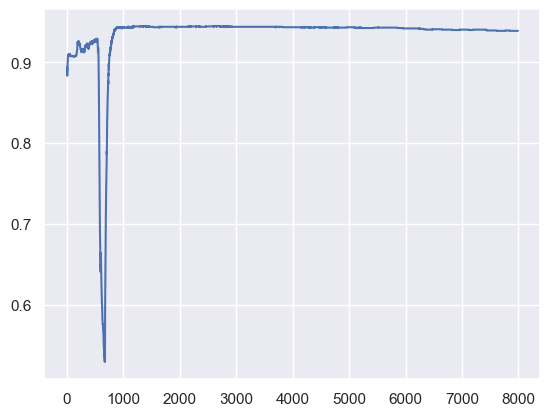

In [27]:
sns.lineplot(y = acc_hist, x = list(range(0, n)))

<AxesSubplot:>

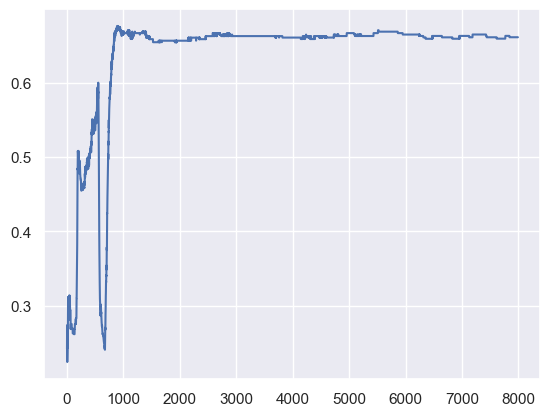

In [30]:
sns.lineplot(y = f1_hist, x = list(range(0, n)))

### Active Learning: Uncertainty Based Query Strategy (UBQS)

#### 1. Entropy based query startegy: for binary classification, we pick the instance which is closest to 0.5 predicted probability

#### 2. Information Density: It is a weighted version of manhattan distance used in Clustering, like Fuzzy Clustering, classification, computer security, and ham/spam detection systems. It is more robust to outliers in contrast to the previous metric.

In [72]:
from sklearn.metrics import pairwise_distances
dist_out = pairwise_distances(train_sample_dynamic, metric="canberra", n_jobs = -1)

In [73]:
avg_similarity_vector = (dist_out.sum(axis = 1) / len(train_sample_dynamic))
avg_disimilarity_vector = 1.0 / avg_similarity_vector

In [74]:
train_sample_dynamic.shape

(7992, 10)

In [75]:
len(avg_similarity_vector), len(pred_prob_vector)

(7992, 7992)

In [76]:
avg_disimilarity_vector.min() ** 0.5, avg_disimilarity_vector.max() ** 0.5

(0.3434318926475851, 0.4767152785447555)

In [77]:
train_sample_dynamic = X_train
train_label_dynamic = y_train

In [78]:
ubqs = GaussianNB()
ubqs = ubqs.partial_fit(X_initial_selection, y_initial_selection, classes=np.unique(y))

In [79]:
n = 0

f1_hist, acc_hist = [], []

while len(train_sample_dynamic) > 0:
    f1_hist.append(f1_score(ubqs.predict(X_test), y_test))
    acc_hist.append(accuracy_score(ubqs.predict(X_test), y_test))
    
    pred_prob_vector = ubqs.predict_proba(train_sample_dynamic)[:,1]
    
    # ubqs_query = np.abs(pred_prob_vector - 0.5).argmin()
    ubqs_query = (np.abs(pred_prob_vector - 0.5) * (avg_disimilarity_vector ** 1)).argmin()
    
    # print(human_positive_labeled_instance)
    
    new_train_x = train_sample_dynamic[ubqs_query, :].reshape(1,-1)
    new_train_y = train_label_dynamic[ubqs_query].reshape(1)

    train_sample_dynamic = np.delete(train_sample_dynamic, ubqs_query, axis = 0).reshape(-1, 10)
    train_label_dynamic = np.delete(train_label_dynamic, ubqs_query, axis = 0)
    
    avg_disimilarity_vector = np.delete(avg_disimilarity_vector, ubqs_query, axis = 0)

    ubqs = ubqs.partial_fit(new_train_x, new_train_y, classes=np.unique(y))

    n += 1

<AxesSubplot:>

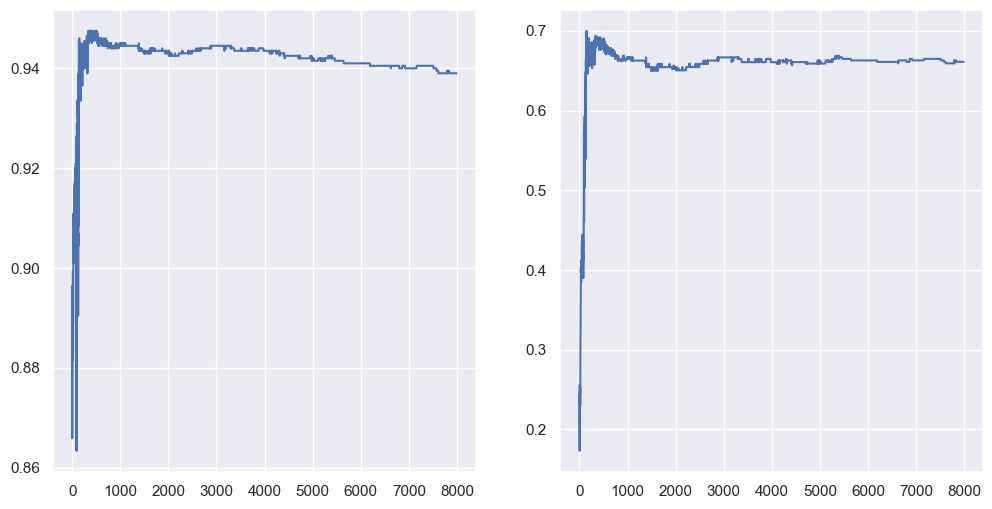

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,6))

sns.lineplot(y = acc_hist, x = list(range(0, n)), ax = ax1)
sns.lineplot(y = f1_hist, x = list(range(0, n)), ax = ax2)

C:\Users\ahans1\AppData\Local\Temp\ipykernel_39776\4154197330.py:2: RuntimeWarning: divide by zero encountered in log2
  sns.lineplot(y = acc_hist, x = np.log2(list(range(0, n))), ax = ax1)
C:\Users\ahans1\AppData\Local\Temp\ipykernel_39776\4154197330.py:3: RuntimeWarning: divide by zero encountered in log2
  sns.lineplot(y = f1_hist, x = np.log2(list(range(0, n))), ax = ax2)


<AxesSubplot:>

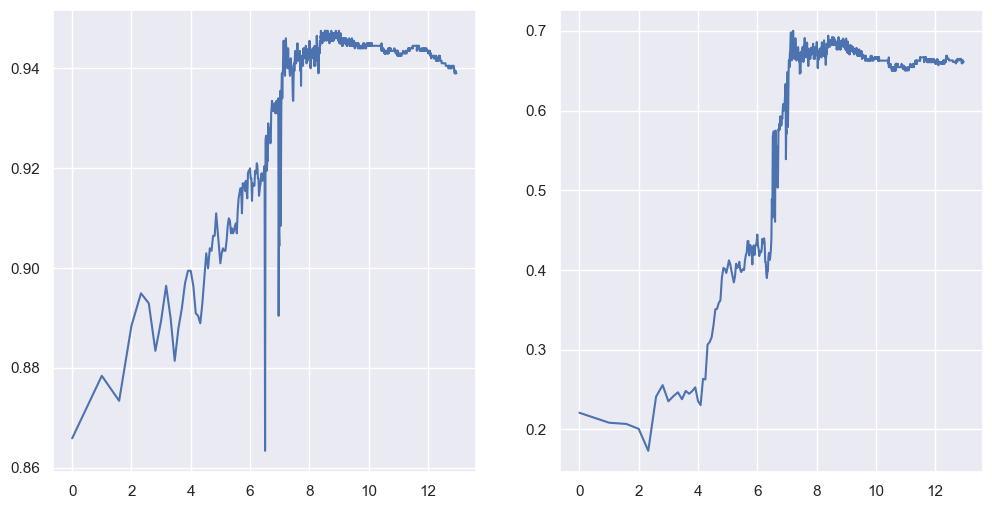

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,6))
sns.lineplot(y = acc_hist, x = np.log2(list(range(0, n))), ax = ax1)
sns.lineplot(y = f1_hist, x = np.log2(list(range(0, n))), ax = ax2)

<AxesSubplot:>

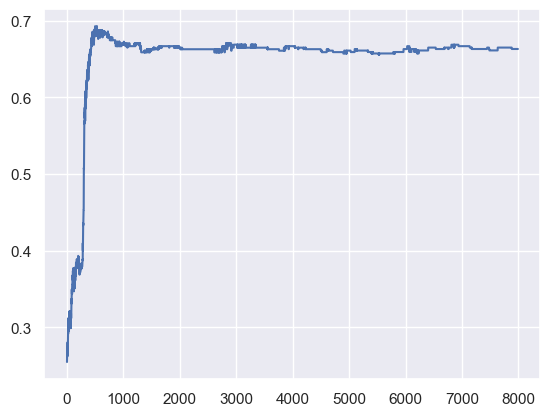

In [149]:
sns.lineplot(y = f1_hist, x = list(range(0, n)))

<AxesSubplot:>

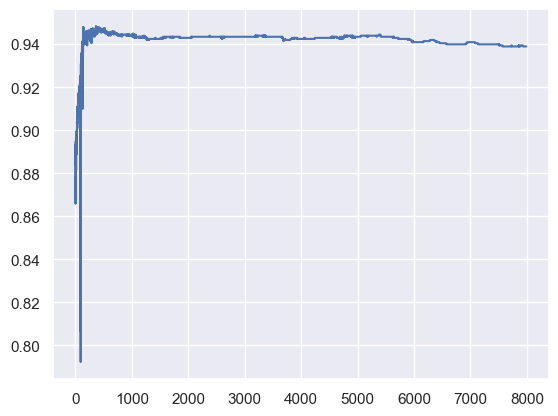

In [160]:
sns.lineplot(y = acc_hist, x = list(range(0, n)))

<AxesSubplot:>

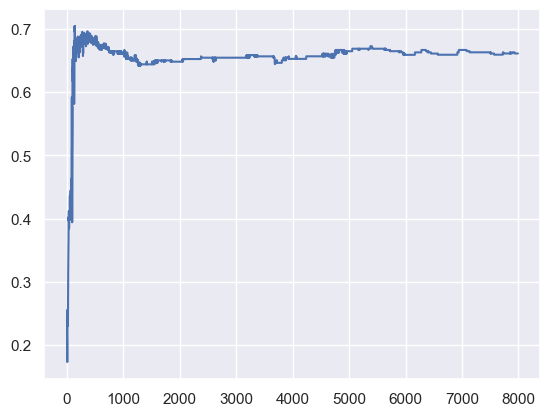

In [161]:
sns.lineplot(y = f1_hist, x = list(range(0, n)))